In [6]:
#Import data, drop 'outcome'
import pandas as pd

df_data = pd.read_csv(r'Business Intelligence & Data Management/Python/LabSession6/Diabetes.csv')

df_diabetes = df_data[df_data['Outcome'] == 1] 

df_diabetes = df_diabetes.drop(['Outcome'], axis = 1)

df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000


In [12]:
# Normalize data scaling
from sklearn.preprocessing import normalize
df_col = df_diabetes.columns
df_diabetes = normalize(df_diabetes)
# convert ndarray to pd
df_diabetes = pd.DataFrame(df_diabetes, columns = df_col)

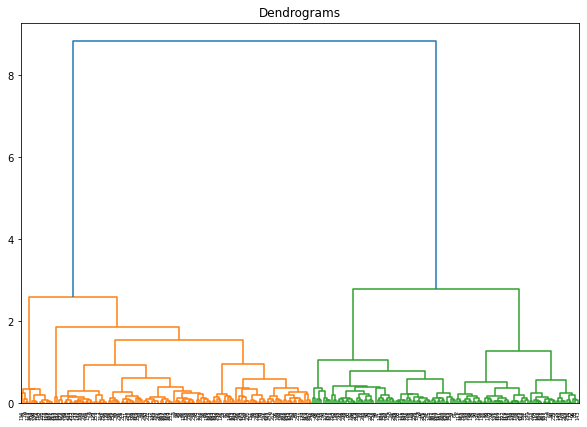

In [15]:
#Create dendrogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df_diabetes, method='ward'))

In [18]:
# Apply hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

cluster.fit_predict(df_diabetes)

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1])

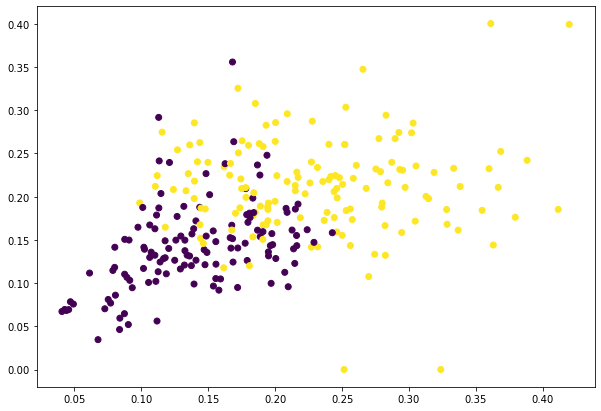

In [19]:
# Visualise hierarchical clusters
plt.figure(figsize=(10, 7))
plt.scatter(df_diabetes['Age'], df_diabetes['BMI'], c=cluster.labels_)

In [25]:
df_diabetes['Age'].describe()

count    268.000000
mean       0.188118
std        0.075720
min        0.040725
25%        0.133213
50%        0.180815
75%        0.237185
max        0.419691
Name: Age, dtype: float64

In [27]:
df_diabetes['BMI'].describe()

count    268.000000
mean       0.178605
std        0.063530
min        0.000000
25%        0.138291
50%        0.175974
75%        0.221286
max        0.400136
Name: BMI, dtype: float64

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
data = pd.read_csv(r'Business Intelligence & Data Management/Python/LabSession7/Store.csv')

In [42]:
# Number of rows
print(len(data))

# Total dataframe size
print(data.size)

# Print columns
print(data.columns)

print(data.iloc[0])

7499
142481
Index(['burgers', 'meatballs', 'eggs', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18'],
      dtype='object')
burgers        chutney
meatballs          NaN
eggs               NaN
Unnamed: 3         NaN
Unnamed: 4         NaN
Unnamed: 5         NaN
Unnamed: 6         NaN
Unnamed: 7         NaN
Unnamed: 8         NaN
Unnamed: 9         NaN
Unnamed: 10        NaN
Unnamed: 11        NaN
Unnamed: 12        NaN
Unnamed: 13        NaN
Unnamed: 14        NaN
Unnamed: 15        NaN
Unnamed: 16        NaN
Unnamed: 17        NaN
Unnamed: 18        NaN
Name: 0, dtype: object


In [44]:
# Transform DataFrame into list of lists
transactions = []
for i in range(len(data)):
    row=[]
    for j in range(len(data.columns)):
        if str(data.values[i,j])!='nan':
            row.append(str(data.values[i,j]))
    transactions.append(row)

In [53]:
# create the association rule
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# retrieve the frequent itemsets with support higher than 0.05
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# print these itemsets :)
print(frequent_itemsets)

     support                    itemsets
0   0.087078                   (burgers)
1   0.081077                      (cake)
2   0.060008                   (chicken)
3   0.163889                 (chocolate)
4   0.080411                   (cookies)
5   0.051073               (cooking oil)
6   0.179624                      (eggs)
7   0.079344                  (escalope)
8   0.170956              (french fries)
9   0.063208           (frozen smoothie)
10  0.095346         (frozen vegetables)
11  0.052407             (grated cheese)
12  0.132018                 (green tea)
13  0.098280               (ground beef)
14  0.076410            (low fat yogurt)
15  0.129617                      (milk)
16  0.238298             (mineral water)
17  0.065742                 (olive oil)
18  0.095079                  (pancakes)
19  0.071343                    (shrimp)
20  0.050540                      (soup)
21  0.174157                 (spaghetti)
22  0.068409                  (tomatoes)
23  0.062542    

In [59]:
# rules when the level of confidence is above the 35% threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

# print these rules
print(rules)

       antecedents      consequents  antecedent support  consequent support  \
0      (chocolate)  (mineral water)            0.163889            0.238298   
1  (mineral water)      (chocolate)            0.238298            0.163889   
2           (eggs)  (mineral water)            0.179624            0.238298   
3  (mineral water)           (eggs)            0.238298            0.179624   
4      (spaghetti)  (mineral water)            0.174157            0.238298   
5  (mineral water)      (spaghetti)            0.238298            0.174157   

    support  confidence      lift  leverage  conviction  
0  0.052674    0.321400  1.348727  0.013619    1.122459  
1  0.052674    0.221041  1.348727  0.013619    1.073370  
2  0.050940    0.283593  1.190076  0.008136    1.063225  
3  0.050940    0.213766  1.190076  0.008136    1.043425  
4  0.059741    0.343032  1.439507  0.018240    1.159420  
5  0.059741    0.250699  1.439507  0.018240    1.102153  


In [61]:
# rules when lift is above 2

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# print these rules
print(rules)

       antecedents      consequents  antecedent support  consequent support  \
0      (chocolate)  (mineral water)            0.163889            0.238298   
1  (mineral water)      (chocolate)            0.238298            0.163889   
2           (eggs)  (mineral water)            0.179624            0.238298   
3  (mineral water)           (eggs)            0.238298            0.179624   
4      (spaghetti)  (mineral water)            0.174157            0.238298   
5  (mineral water)      (spaghetti)            0.238298            0.174157   

    support  confidence      lift  leverage  conviction  
0  0.052674    0.321400  1.348727  0.013619    1.122459  
1  0.052674    0.221041  1.348727  0.013619    1.073370  
2  0.050940    0.283593  1.190076  0.008136    1.063225  
3  0.050940    0.213766  1.190076  0.008136    1.043425  
4  0.059741    0.343032  1.439507  0.018240    1.159420  
5  0.059741    0.250699  1.439507  0.018240    1.102153  


In [64]:
# Import wine.csv
from sklearn.metrics import pairwise
wine_df = pd.read_csv(r'Business Intelligence & Data Management/Python/LabSession7/Wine.csv')
wine_df = wine_df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity','Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity','Hue', 'OD280_OD315', 'Proline']]
# Create itempairs using euclidian distance 
d = pairwise.pairwise_distances(wine_df, metric='euclidean')
# Determine amount of cells in itemspairs
d.size

31684

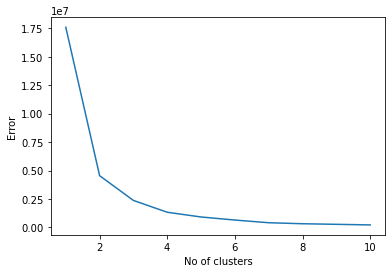

In [66]:
# Plot the error rate for different values of K
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(wine_df)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
data = pd.read_csv(r'Business Intelligence & Data Management/Python/LabSession7/Retail.csv')

In [69]:
# Transform DataFrame into list of lists
transactions = []
for i in range(len(data)):
    row=[]
    for j in range(len(data.columns)):
        if str(data.values[i,j])!='nan':
            row.append(str(data.values[i,j]))
    transactions.append(row)

In [73]:
# create the association rule
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# retrieve the frequent itemsets with support higher than 0.2
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# print these itemsets :)
print(frequent_itemsets)

     support              itemsets
0   0.426752               (Bagel)
1   0.503185               (Bread)
2   0.500000              (Cheese)
3   0.404459              (Diaper)
4   0.436306                (Eggs)
5   0.474522                (Meat)
6   0.503185                (Milk)
7   0.359873              (Pencil)
8   0.436306                (Wine)
9   0.280255        (Bagel, Bread)
10  0.226115         (Bagel, Milk)
11  0.235669       (Cheese, Bread)
12  0.229299       (Bread, Diaper)
13  0.203822         (Bread, Meat)
14  0.280255         (Bread, Milk)
15  0.242038         (Bread, Wine)
16  0.296178        (Eggs, Cheese)
17  0.321656        (Cheese, Meat)
18  0.305732        (Cheese, Milk)
19  0.267516        (Cheese, Wine)
20  0.232484        (Diaper, Wine)
21  0.264331          (Eggs, Meat)
22  0.245223          (Eggs, Milk)
23  0.238854          (Eggs, Wine)
24  0.245223          (Meat, Milk)
25  0.248408          (Meat, Wine)
26  0.219745          (Milk, Wine)
27  0.213376  (Eggs,

In [79]:
# rules when the level of lift is above the 1.4 threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=.2)

# print these rules
print(rules)

       antecedents     consequents  antecedent support  consequent support  \
0          (Bagel)         (Bread)            0.426752            0.503185   
1          (Bread)         (Bagel)            0.503185            0.426752   
2          (Bagel)          (Milk)            0.426752            0.503185   
3           (Milk)         (Bagel)            0.503185            0.426752   
4         (Cheese)         (Bread)            0.500000            0.503185   
5          (Bread)        (Cheese)            0.503185            0.500000   
6          (Bread)        (Diaper)            0.503185            0.404459   
7         (Diaper)         (Bread)            0.404459            0.503185   
8          (Bread)          (Meat)            0.503185            0.474522   
9           (Meat)         (Bread)            0.474522            0.503185   
10         (Bread)          (Milk)            0.503185            0.503185   
11          (Milk)         (Bread)            0.503185          